In [ ]:
"""
OBSERVAÇÕES:
    - Não conseguimos implementar a minimização :(
    - Nem todos os exemplos de maximização estão funcionando corretamente e não sabemos dizer o motivo :(
    - Selecionamos 9 exemplos que estão funcionando
"""

#Importação das bibliotecas
import matplotlib.pyplot as plt
import numpy as np

#Função para exibir uma matriz no formato tradicional
def exibir_matriz(matriz):
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            print(f'[{matriz[i][j]:^5}]', end='')
        print()

#Função que restringe os caracteres que podem ser digitados pelo usuário
def restringir_caracter(mensagem):
    invalido = True
    while invalido:
        verificacao = input(mensagem)
        try:
            float(verificacao)
            invalido = False
        except:
            print('Informe um dígito válido!')
    return verificacao 

In [ ]:
#Função que gera a matriz dos coeficientes da função objetivo
def matriz_coeficientes_funcao_objetivo(qtd_variaveis_decisao):
    coeficientes_funcao_objetivo = [[]]
    print()
    for i in range(qtd_variaveis_decisao):
        coeficientes_funcao_objetivo[0].append(float(restringir_caracter('Informe o coeficiente da váriavel de decisão X{0} na função objetivo: '.format(i+1))))
    return coeficientes_funcao_objetivo

#Função que cria a matriz transposta das incógnitas
def matriz_transposta_incognitas(qtd_variaveis_decisao):
    matriz_incognitas = []
    for i in range(qtd_variaveis_decisao):
        matriz_incognitas.append(['X{0}'.format(i+1)])
    return matriz_incognitas

#Função que gera a matriz dos coeficientes das restrições
def matriz_coeficientes_restricoes(qtd_restricoes, qtd_variaveis_decisao):
    matriz_coeficientes_restricoes = []
    for i in range(qtd_restricoes):
        linha = []
        print('\nRestrição {0}:'.format(i+1))
        for j in range(qtd_variaveis_decisao):
            elemento = float(restringir_caracter('Informe o coeficiente de X{0}: '.format(j+1)))
            linha.append(elemento)
        matriz_coeficientes_restricoes.append(linha)
    return matriz_coeficientes_restricoes

#Função que cria a matriz dos termos independentes das restrições
def matriz_termos_independentes_restricoes(qtd_restricoes):
    matriz_termos_independentes_restricoes = []
    for i in range(qtd_restricoes):
        print('\nRestrição {0}:'.format(i+1))
        matriz_termos_independentes_restricoes.append([float(restringir_caracter('Informe o termo independente: '))])
    return matriz_termos_independentes_restricoes

#Função que cria uma matriz identidade
def matriz_identidade(ordem):
    matriz_identidade = []
    for i in range(ordem):
        matriz_identidade.append([])
        for j in range(ordem):
            result = 1 if i == j else 0
            matriz_identidade[i].append(result)
    return matriz_identidade

#Função que concatena a matriz dos coeficientes das restrições com a matriz identidade
def matriz_coeficientes_restricoes_identidade(matriz_coeficientes_restricoes, matriz_identidade):
    matriz1 = np.array(matriz_coeficientes_restricoes)
    matriz2 = np.array(matriz_identidade)
    matriz_coeficientes_restricoes_identidade = np.concatenate((matriz1, matriz2), axis=1)
    return matriz_coeficientes_restricoes_identidade

#Função que multiplica uma matriz por um número real
def multiplicar_matriz_numero_real(numero_real, matriz):
    matriz_multiplicacao = []
    for i in range(len(matriz)):
        matriz_multiplicacao.append([])
        for j in range(len(matriz[0])):
            multiplicacao = numero_real * matriz[i][j] 
            matriz_multiplicacao[i].append(multiplicacao)
    return matriz_multiplicacao

#Função que cria a matriz das variáveis de base
def matriz_variaveis_base(qtd_restricoes):
    matriz_variaveis_base = []
    for i in range(qtd_restricoes):
        matriz_variaveis_base.append(['S{0}'.format(i+1)])
    return matriz_variaveis_base

#Função que cria uma matriz auxiliar (utilizada no momento da finalização do Método Simplex para exibir os valores encontrados para as incógnitas)
def aux_matrix(qtd_restricoes):
    aux_matrix = []
    for i in range(qtd_restricoes):
        aux_matrix.append([qtd_restricoes+i])
    return aux_matrix

#Função que multiplica os coeficientes da função objetivo por -1
def matriz_coeficientes_negativos_funcao_objetivo(matriz_coeficientes_funcao_objetivo):
    matriz = multiplicar_matriz_numero_real(-1, matriz_coeficientes_funcao_objetivo)
    return matriz

#Função que retorna uma determinada coluna de uma matriz
def coluna(matriz, indice):
    return [row[indice] for row in matriz]

#Função para gerar uma matriz transposta
def matriz_transposta(matriz):
    matriz_transposta = []
    for j in range(len(matriz[0])):
        matriz_transposta.append([])
        for i in range(len(matriz)):
            result = matriz[i][j]
            matriz_transposta[j].append(result)
    return matriz_transposta

#Função para multiplicar duas matrizes
def multiplicar_matrizes(matriz1, matriz2):
    if len(matriz1[0]) != len(matriz2):
        print('\nDimensões incorretas. O número de colunas da matriz A precisa ser igual ao número de linhas da matriz B')
        return
    else:
        matrizes_multiplicacao = [] #Cria a matriz
        for i in range(len(matriz1)):
            matrizes_multiplicacao.append([]) #Adiciona uma linha
            for j in range(len(matriz2[0])):
                matrizes_multiplicacao[i].append(0) #Preenche a linha com o elemento 0
                for k in range(len(matriz1[0])):
                    matrizes_multiplicacao[i][j] += matriz1[i][k] * matriz2[k][j]
        return matrizes_multiplicacao

#Função para subtrair duas matrizes
def subtrair_matrizes(matriz1, matriz2):
    matriz_subtracao = []
    for i in range(len(matriz1)):
        matriz_subtracao.append([])
        for j in range(len(matriz1[0])):
            subtracao = matriz1[i][j] - matriz2[i][j]
            matriz_subtracao[i].append(subtracao)
    return matriz_subtracao

In [ ]:
#Função na qual o usuário pode escolher as maneiras de otimizar um problema (maximizar ou minimizar) e exibir os resultados (modo simplificado ou modo completo) 
def menu():
    #Inputs
    qtd_variaveis_decisao = int(restringir_caracter('Informe a quantidade de variáveis de decisão: '))
    qtd_restricoes = int(restringir_caracter('Informe a quantidade de restrições: '))

    #Maneiras de exibir os resultados
    while True:
        print('\nOpções de cálculo: ')
        print('[1] - Modo Simplificado')
        print('[2] - Modo Completo')
        modo_opcao = int(restringir_caracter('Informe um modo: '))

        if modo_opcao == 1 or modo_opcao == 2:
            break
        else:
            print('\nInforme um modo válido!')

    #Maneiras de otimizar um problema
    while True:
        print('\nO que deseja realizar com a função objetivo?')
        print('[1] - Maximizar')
        print('[2] - Minimizar')
        funcao_objetivo_opcao = int(restringir_caracter('Opção: '))

        if funcao_objetivo_opcao == 1:
            break
        elif funcao_objetivo_opcao == 2:
            print('\nFunção não implementada :(')
            return           
        else:
            print('\nInforme uma opção válida!')
    
    #Chamando a função do Passo 1 do Método Simplex e passando os parâmetros
    primeiro_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, funcao_objetivo_opcao)

In [ ]:
#Passo 1 do Método Simplex
def primeiro_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, funcao_objetivo_opcao):
    print('\nPASSO 1')
    
    #Matriz dos coeficientes da função objetivo
    C = matriz_coeficientes_funcao_objetivo(qtd_variaveis_decisao)

    #Matriz transposta das incógnitas
    X = matriz_transposta_incognitas(qtd_variaveis_decisao)

    #Matriz dos coeficientes das restrições
    A = matriz_coeficientes_restricoes(qtd_restricoes, qtd_variaveis_decisao)
    
    #Matriz dos termos independentes das restrições
    b = matriz_termos_independentes_restricoes(qtd_restricoes)

    #Matriz identidade
    I = matriz_identidade(qtd_restricoes)
    
    #Matriz dos coeficientes das restrições concatenada com a matriz identidade
    A_I = matriz_coeficientes_restricoes_identidade(A, I)

    #Exibição das matrizes
    print('\nMatriz dos coeficientes da função objetivo (C):')
    exibir_matriz(C)

    print('\nMatriz transposta das incógnitas (X):')
    exibir_matriz(X)

    print('\nMatriz dos coeficientes das restrições (A):')
    exibir_matriz(A)

    print('\nMatriz dos termos independentes das restrições (b):')
    exibir_matriz(b)

    #Exibição específica (somente para o modo completo)
    if modo_opcao == 2:
        print('\nMatriz identidade (I):')
        exibir_matriz(I)

        print('\nMatriz dos coeficientes das restrições (A) + Matriz identidade (I):')
        exibir_matriz(A_I)

    #Chamando a função do Passo 2 do Método Simplex e passando os parâmetros
    segundo_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, funcao_objetivo_opcao, C, X, A, b, I, A_I)

In [ ]:
#Passo 2 do Método Simplex
def segundo_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, funcao_objetivo_opcao, matriz_coeficientes_funcao_objetivo, matriz_transposta_incognitas, matriz_coeficientes_restricoes, matriz_termos_independentes_restricoes, matriz_identidade, matriz_coeficientes_restricoes_identidade):

    qtd_variaveis_decisao = qtd_variaveis_decisao
    qtd_restricoes = qtd_restricoes
    C = matriz_coeficientes_funcao_objetivo
    A = matriz_coeficientes_restricoes
    b = matriz_termos_independentes_restricoes

    #Matriz das variáveis de base
    XB = matriz_variaveis_base(qtd_restricoes)

    #Matriz auxiliar
    matrix_aux = aux_matrix(qtd_restricoes)

    #Matriz identidade
    B = matriz_identidade

    #Coeficientes da função objetivo multiplicados por -1
    C_negativo = matriz_coeficientes_negativos_funcao_objetivo(matriz_coeficientes_funcao_objetivo)

    #Exibição específica (somente para o modo completo)
    if modo_opcao == 2:
        print('\nPASSO 2')

        print('\nMatriz das variáveis de base (XB):')
        exibir_matriz(XB)

        print('\nMatriz dos coeficientes das variáveis de base (B):')
        exibir_matriz(B)

        print('\nMatriz dos coeficientes negativos da função objetivo (-C):')
        exibir_matriz(C_negativo)

    #Qual incógnita entra na base?
    menor_valor = 1000000000000
    indice_entrada = 0
    for i in range(len(C_negativo[0])):
        if C_negativo[0][i] < menor_valor:
            menor_valor = C_negativo[0][i]
            indice_entrada = i
    
    #Qual incógnita sai da base? 
    #Coluna Pivot do Passo 2
    coluna_pivot = coluna(matriz_coeficientes_restricoes_identidade, indice_entrada)
    coluna_pivot = matriz_transposta([coluna_pivot])

    #Lado Direito do Passo 2
    lado_direito = matriz_termos_independentes_restricoes

    #Cálculo do Passo 2 (quem irá sair)
    menor_valor_calculo = 1000000000000
    indice_saida = 0
    for i in range(len(coluna_pivot)):
        if coluna_pivot[i][0] != 0:
            divisao = matriz_termos_independentes_restricoes[i][0] / coluna_pivot[i][0]
            if divisao < menor_valor_calculo:
                menor_valor_calculo = divisao
                indice_saida = i

    #Exibição específica (somente para o modo completo)
    if modo_opcao == 2:
        print('\nQual incógnita entra na base?')
        print(f'Menor valor da matriz dos coeficientes negativos da função objetivo: {menor_valor}')
        print(f'Incógnita que entrará na base: X{indice_entrada+1}')

        print('\nQual incógnita sai da base?')
        print('Coluna pivot:')
        exibir_matriz(coluna_pivot)

        print('\nLado direito:')
        exibir_matriz(lado_direito)

        print('\nCálculo:')
        print(f'Menor valor do cálculo: {menor_valor_calculo}')
        print(f'Quem irá sair: S{indice_saida+1}')

    #Gerar matriz dos coeficientes das novas variáveis de base
    matriz_coeficientes_novas_variaveis_base = [[]]
    for _ in range(qtd_restricoes):
        matriz_coeficientes_novas_variaveis_base[0].append(0)

    #Chamando a função do Passo 3 do Método Simplex e passando os parâmetros
    terceiro_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, C, A, b, XB, matrix_aux, B, coluna_pivot, indice_entrada, indice_saida, matriz_coeficientes_novas_variaveis_base)

In [ ]:
#Passo 3 do Método Simplex
def terceiro_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, matriz_coeficientes_funcao_objetivo, matriz_coeficientes_restricoes, matriz_termos_independentes_restricoes, matriz_variaveis_base, aux_matrix, matriz_identidade, coluna_pivot, indice_entrada, indice_saida, matriz_coeficientes_novas_variaveis_base):

    C = matriz_coeficientes_funcao_objetivo
    A = matriz_coeficientes_restricoes
    b = matriz_termos_independentes_restricoes

    #Nova matriz das variáveis de base
    nova_XB = matriz_variaveis_base
    nova_XB[indice_saida][0] = 'X' + str(indice_entrada+1)
    #Nova matriz auxiliar
    nova_matriz_aux = aux_matrix
    nova_matriz_aux[indice_saida][0] = indice_entrada
    
    #Nova matriz dos coeficientes das variáveis da base
    B = matriz_identidade
    for i in range(len(coluna_pivot)):
        B[i][indice_saida] = coluna_pivot[i][0]

    #Matriz inversa da matriz B.
    B_inversa = np.linalg.inv(B)

    #Matriz dos coeficientes das novas variáveis da base vindos da função objetivo
    CB = matriz_coeficientes_novas_variaveis_base
    CB[0][indice_saida] = C[0][indice_entrada]

    #Calcula-se
    calculo1 = multiplicar_matrizes(CB, B_inversa)
    calculo2 = multiplicar_matrizes(calculo1, A)
    resultado = subtrair_matrizes(calculo2, C)

    #Exibição específica (somente para o modo completo)
    if modo_opcao == 2:
        print('\nPASSO 3')
        print('\nNova matriz das variáveis de base (XB):')
        exibir_matriz(nova_XB)

        print('\nNova matriz dos coeficientes das variáveis de base (B):')
        exibir_matriz(B)

        print('\nMatriz inversa da matriz B: ')
        exibir_matriz(B_inversa)

        print('\nMatriz dos coeficientes das novas variaveis da base vindos da função objetivo (CB): ')
        exibir_matriz(CB)

        print('\nCálculo -> CB * B_inversa * A - C:')
        exibir_matriz(resultado)

    #Verificar se todos os elementos da matriz resultado são maiores ou iguais a 0
    #Finalização do Simplex
    if np.all(np.array(resultado) >= 0):
        solucao_inicial = multiplicar_matrizes(B_inversa, b)

        solucao_metodo_simplex = []
        for i in range(qtd_variaveis_decisao):
            solucao_metodo_simplex.append([0])
        
        for i in range(len(nova_matriz_aux)):
            if nova_matriz_aux[i][0] < qtd_variaveis_decisao:
                solucao_metodo_simplex[nova_matriz_aux[i][0]][0] = solucao_inicial[i]
        
        print('\nValores das incógnitas:')
        for i in range(len(solucao_metodo_simplex)):
            print(f'X{i+1} = {solucao_metodo_simplex[i][0]}')

        finalizando = multiplicar_matrizes(CB, B_inversa)
        resultado_otimo = multiplicar_matrizes(finalizando, b)
        print(f'\nSolução ótima = {resultado_otimo[0]}')

        #Exibir a solução gráfica somente se a quantidade de variáveis de decisão for igual a 2
        if qtd_variaveis_decisao == 2:
            solucao_grafica(A, b, solucao_metodo_simplex)
    #Se não
    else:
        #Qual incógnita entra na base?
        menor_valor_passo3 = 1000000000000
        indice_entrada_passo3 = 0
        for i in range(len(resultado[0])):
            if resultado[0][i] < menor_valor_passo3:
                menor_valor_passo3 = resultado[0][i]
                indice_entrada_passo3 = i
        
        #Qual incógnita sai da base? 
        #Coluna Pivot do Passo 3
        matriz_pivot_passo3 = multiplicar_matrizes(B_inversa, A)
        coluna_pivot_passo3 = coluna(matriz_pivot_passo3, indice_entrada_passo3)
        coluna_pivot_passo3 = matriz_transposta([coluna_pivot_passo3])

        #Lado Direito do Passo 3
        matriz_lado_direito_passo3 = multiplicar_matrizes(B_inversa, b)

        #Cálculo do Passo 3 (quem irá sair)
        menor_valor_calculo_passo3 = 1000000000000
        indice_saida_passo3 = 0
        for i in range(len(coluna_pivot_passo3)):
            if coluna_pivot_passo3[i][0] != 0:
                divisao = matriz_lado_direito_passo3[i][0] / coluna_pivot_passo3[i][0]
                if divisao < menor_valor_calculo_passo3:
                    menor_valor_calculo_passo3 = divisao
                    indice_saida_passo3 = i

        #Exibição específica (somente para o modo completo)
        if modo_opcao == 2:
            print('\nQual incógnita entra na base?')
            print(f'Menor valor da matriz resultante do cálculo: {menor_valor_passo3}')
            print(f'Incógnita que entrará na base: X{indice_entrada_passo3+1}')

            print('\nMatriz proveniente da multiplicação de B_inversa com A:')
            exibir_matriz(matriz_pivot_passo3)
            print('\nColuna pivot do passo 3:')
            exibir_matriz(coluna_pivot_passo3)

            print('\nMatriz proveniente da multiplicação de B_inversa com b:')
            exibir_matriz(matriz_lado_direito_passo3)
            print('\nLado direito do passo 3:')
            exibir_matriz(matriz_lado_direito_passo3)

            print('\nCálculo:')
            print(f'Menor valor do cálculo: {menor_valor_calculo_passo3}')
            print(f'Quem irá sair: S{indice_saida_passo3+1}')

        #Repetir o Passo 3 do Método Simplex até que todos os elementos da matriz resultado sejam maiores ou iguais a 0
        terceiro_passo(qtd_variaveis_decisao, qtd_restricoes, modo_opcao, C, A, b, nova_XB, nova_matriz_aux, B, coluna_pivot_passo3, indice_entrada_passo3, indice_saida_passo3, CB)

In [ ]:
#Função que cria a solução gráfica do Método Simplex (funciona somente nos problemas com duas variáveis de decisão)
def solucao_grafica(matriz_coeficientes_restricoes, matriz_termos_independentes_restricoes, solucao_metodo_simplex):
    #Encontra os pontos no gráfico
    for i in range(len(matriz_coeficientes_restricoes)):
        #Maneira de encontrar os pontos no gráfico se não houver nenhum coeficiente de restrição igual a 0
        if matriz_coeficientes_restricoes[i][0] != 0 and matriz_coeficientes_restricoes[i][1] != 0:
            ponto_x = matriz_termos_independentes_restricoes[i][0] / matriz_coeficientes_restricoes[i][0]
            ponto_y = matriz_termos_independentes_restricoes[i][0] / matriz_coeficientes_restricoes[i][1]
            plt.plot([ponto_x, 0], [0, ponto_y])
            plt.plot([solucao_metodo_simplex[0][0]], [solucao_metodo_simplex[1][0]], 'bo')
        
        #Maneira de encontrar os pontos no gráfico se houver algum coeficiente de restrição igual a 0 (função constante)
        if matriz_coeficientes_restricoes[i][0] == 0 or matriz_coeficientes_restricoes[i][1] == 0:
            if matriz_coeficientes_restricoes[i][1] == 0:
                ponto_x = matriz_termos_independentes_restricoes[i][0] / matriz_coeficientes_restricoes[i][0]
                plt.axvline(x = ponto_x)
            elif matriz_coeficientes_restricoes[i][0] == 0:
                ponto_y = matriz_termos_independentes_restricoes[i][0] / matriz_coeficientes_restricoes[i][1]
                plt.axhline(y = ponto_y)
            plt.plot([solucao_metodo_simplex[0][0]], [solucao_metodo_simplex[1][0]], 'bo')

    #Nomeia os eixos do gráfico
    plt.xlabel('X1')
    plt.ylabel('X2')

    #Exibe o gráfico
    plt.show()

**EXEMPLOS TESTADOS**

- **Exemplo 2x2**
    ```
    Max Z = 4X1 + 1X2

    Sujeito a:   
    1X1 + 6X2 <= 48  
    2X1 + 4X2 <= 60

    A solução ótima é Z = 120  
    X1 = 30  
    X2 = 0  
    ```

- **Exemplo 2x2**
    ```
    Max Z = 4X1 + 1X2  
    
    Sujeito a:   
    1X1 + 0X2 <= 48  
    0X1 + 4X2 <= 60  
    
    A solução ótima é Z = 207
    X1 = 48
    X2 = 15 
    ```

- **Exemplo 2x2**
    ```
    Max Z = 9X1 + 3X2

    Sujeito a: 
    0X1 + 3X2 <= 15
    6X1 + 0X2 <= 18

    A solução ótima é Z = 42
    X1 = 3
    X2 = 5
    ```
  
- **Exemplo 2x2**
    ```
    Max Z = 2X1 + 6X2

    Sujeito a: 
    4X1 + 1X2 <= 80
    0X1 + 2X2 <= 100

    A solução ótima é Z = 315
    X1 = 7.5
    X2 = 50
    ```

- **Exemplo 2x3**
    ```
    Max Z = 5X1 + 6X2

    Sujeito a: 
    1X1 + 0X2 <= 6
    0X1 + 2X2 <= 12
    3X1 + 2X2 <= 18

    A solução ótima é Z = 46
    X1 = 2
    X2 = 6
    ```

- **Exemplo 3x3**
    ```
    Max Z = 1X1 + 4X2 + 2X3

    Sujeito a: 
    2X1 + 2X2 + 0X3 <= 20
    1X1 + 0X2 + 3X3 <= 15
    1X1 + 1X2 + 2X3 <= 40

    A solução ótima é Z = 50
    X1 = 0
    X2 = 10
    X3 = 5
    ```

- **Exemplo 3x3**
    ```
    Max Z = 1X1 + 2X2 + 1X3

    Sujeito a: 
    0X1 + 1X2 + 4X3 <= 25
    2X1 + 1X2 + 0X3 <= 30
    2X1 + 1X2 + 0X3 <= 35

    A solução ótima é Z = 52.5
    X1 = 2.5
    X2 = 25
    X3 = 0
    ```

- **Exemplo 3x4**
    ```
    Max Z = 5X1 + 1X2 + 2X3

    Sujeito a: 
    2X1 + 4X2 + 1X3 <= 80
    2X1 + 0X2 + 1X3 <= 60
    0X1 + 1X2 + 2X3 <= 50
    4X1 + 2X2 + 2X3 <= 30

    A solução ótima é Z = 37.5
    X1 = 7.5
    X2 = 0
    X3 = 0
    ```

- **Exemplo 4x4**
    ```
    Max Z = 1X1 + 0X2 + 4X3 + 2X4
    
    Sujeito a: 
    0X1 + 1X2 + 4X3 + 1X4 <= 100
    1X1 + 0X2 + 1X3 + 2X4 <= 150
    1X1 + 0X2 + 1X3 + 2X4 <= 200
    1X1 + 4X2 + 2X3 + 3X4 <= 250

    A solução ótima é Z = 225
    X1 = 125
    X2 = 0
    X3 = 25
    X4 = 0
    ```


Informe a quantidade de variáveis de decisão: 2
Informe a quantidade de restrições: 3

Opções de cálculo: 
[1] - Modo Simplificado
[2] - Modo Completo
Informe um modo: 2

O que deseja realizar com a função objetivo?
[1] - Maximizar
[2] - Minimizar
Opção: 1

PASSO 1

Informe o coeficiente da váriavel de decisão X1 na função objetivo: 5
Informe o coeficiente da váriavel de decisão X2 na função objetivo: 6

Restrição 1:
Informe o coeficiente de X1: 1
Informe o coeficiente de X2: 0

Restrição 2:
Informe o coeficiente de X1: 0
Informe o coeficiente de X2: 2

Restrição 3:
Informe o coeficiente de X1: 3
Informe o coeficiente de X2: 2

Restrição 1:
Informe o termo independente: 6

Restrição 2:
Informe o termo independente: 12

Restrição 3:
Informe o termo independente: 18

Matriz dos coeficientes da função objetivo (C):
[ 5.0 ][ 6.0 ]

Matriz transposta das incógnitas (X):
[ X1  ]
[ X2  ]

Matriz dos coeficientes das restrições (A):
[ 1.0 ][ 0.0 ]
[ 0.0 ][ 2.0 ]
[ 3.0 ][ 2.0 ]

Matriz dos term

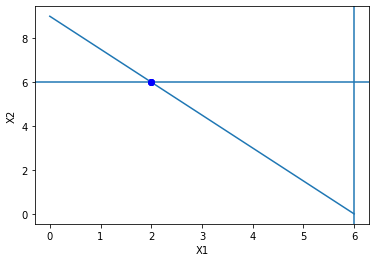

In [ ]:
#Chama a função menu()
menu()